# <font color=red> _Compte rendu du TP2 Probabilité et statistiques_ </font>
## <font color=blue> _Morjene Nouha_ </font>
### _2LM1 TP2_

# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))
#avoir une valeur de l'ensemble{1,2,3,...,6} aléatoirement et on transforme le tableau par la fonction int() en un entier

In [3]:
Roll()

2

### Compléter le code et commenter

In [4]:
A=0 #position
NA=0 #la valeur du dé après le lancement
N=10 #la position du cible
c=0 #compteur
while (A<N) :
    NA=Roll()
    if NA==6 and A==0:
        A=1
        c=c+1
        print(NA,A,c)
    elif A>0 and NA+A<N:
        A=A+NA
        c=c+1
        print(NA,A,c)
    elif NA+A==N:
        c=c+1
        A=A+NA
        print(NA,A,c)
        break
    else:
        c=c+1
        print(NA,A,c)

6 1 1
5 6 2
6 6 3
4 10 4


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(N):
    # -Simulation d'un jeux de lido simmple ave un grille de longueur S donnée
    # -Le principe est déterminer le nombre de coups nécessaire pour sortir du prison et atteindre la cible S
    
    A=0
    NA=0
    c=0
    while (A<N) :
        NA=Roll()
        if NA==6 and A==0: #sortir du prison et rejouer (lancer le dé de nouveau)
            A=1
            c=c+1
            #print(NA,A,c)
        elif A>0 and NA+A<N:
            A=A+NA
            c=c+1
            #print(NA,A,c)
        elif NA+A==N:
            c=c+1
            A=A+NA
            #print(NA,A,c)
            break
        else:
            c=c+1
            #print(NA,A,c)

    return c
    

In [6]:
sim(20)

41

### Simulation de $10^5$  scénario 

In [7]:
10**5

100000

In [8]:
N=10**5
L=[]
for i in range(N): #jouer N fois
    L.append(sim(20))
def moyenne(L):
    tot=0
    for u in L: #parcourir la liste
        tot=tot+u #calcul de la somme
    return tot/len(L) #calcul du moyenne (len() calcul de longeur de la liste)
moyenne(L)

16.23238

dans cette partie : 
  - jouer N=10**5 fois et chaque fois on sauvegarde le résultat (le nombre de coups nécessaire pour atteidre 
     la cible) dans la liste L
 - calculer de la somme et la moyenne(espérance mathématique                                                               

#### <font color=red> <b>_Remarque:_ </font>
<b> En modifiant le nombre de stimulation N, on constate que la moyenne(l''espérance) est presque constante=16,..

In [9]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [10]:
ESP=Freq.sum()/10**5 #calcul de l'espérance

In [11]:
x=list(range(10,20))

In [12]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [13]:
import matplotlib.pyplot as plt
xx=np.linspace(10,20,50)
yy=0.28871527272727254*xx+10.443562545454547

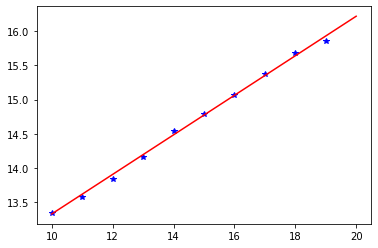

In [14]:
plt.plot(x,y,'b*')#l'espérance est une droite d'équation de la forme ax+b
plt.plot(xx,yy,'r')

In [15]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [16]:
slope #pente de la droite(a)

0.29098703030303036

In [17]:
intercept #intersection(b)


10.40315406060606

## <font color=red> Conclusion: </font>

$$\mathbb{E}(X_n)=0.290\times n + 10.403$$